In [ ]:
# try to get just a single CCG's worth of data, not using BQ cache and compare KDE plots

In [58]:
from lib.outliers import Runner, Plots
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
from_date = date(year=2021,month=4,day=1)
to_date = date(year=2021,month=10,day=1)
r = Runner(from_date,to_date,5,["practice","ccg","pcn","stp"],False)

In [ ]:
r.build.run()

In [ ]:
r.build.fetch_results()

In [ ]:
r._run_item_report('ccg','04Y')

In [ ]:
from ebmdatalab import bq
import pandas as pd

In [71]:
for entity in ['practice','pcn','stp']:
    sql = f"""
                SELECT
                    chemical,
                    measure_array as `array`
                FROM
                    `ebmdatalab.outlier_detection.{entity}_measure_arrays`
                WHERE
                    build_id = 1;
            """
    csv_path = f"../data/bq_cache/{entity}_measure_arrays.zip"
    res = bq.cached_read(
        sql,
        csv_path,
        use_cache=False,
    )

Downloading: 100%|██████████| 364/364 [00:00<00:00, 1195.87rows/s]


In [66]:
csv_path = f"../data/bq_cache/ccg_measure_arrays.zip"
res = bq.cached_read(
    sql,
    csv_path,
    use_cache=False,
)

Downloading: 100%|██████████| 706/706 [00:00<00:00, 1160.20rows/s]


In [ ]:
res.array

In [ ]:
res.array.values[0] #= res.array.apply(str)

In [ ]:
res.array = res.array.apply(lambda x: np.fromstring(x[1:-1], sep=","))

In [ ]:
self.results_measure_arrays[entity] = res.set_index("chemical")

In [67]:
distribution = sorted(res.query('chemical=="1001010AD"')['array'].values[0])

In [68]:
distribution

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.1612e-05,
 1.3426e-05,
 2.2275e-05,
 3.1228e-05,
 3.1356e-05,
 3.3556e-05,
 5.2106e-05,
 5.3094e-05,
 5.6812e-05,
 5.8429e-05,
 6.0001e-05,
 6.4066e-05,
 7.5017e-05,
 7.5445e-05,
 7.879e-05,
 8.0092e-05,
 9.0791e-05,
 9.4353e-05,
 9.5099e-05,
 9.7494e-05,
 0.000101321,
 0.000103521,
 0.000109923,
 0.000110149,
 0.000112254,
 0.000113411,
 0.000116966,
 0.000119159,
 0.000125766,
 0.000126135,
 0.000128573,
 0.000143818,
 0.000145252,
 0.000146349,
 0.000147904,
 0.000148228,
 0.000149436,
 0.000155703,
 0.000158845,
 0.000159736,
 0.000162961,
 0.000177845,
 0.000185809,
 0.000207555,
 0.000209211,
 0.000226239,
 0.000237963,
 0.000241003,
 0.00024547,
 0.000257359,
 0.000261549,
 0.000261955,
 0.000263316,
 0.000302019,
 0.000302314,
 0.000

In [54]:
import seaborn as sns

In [62]:
~np.isnan(distribution)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

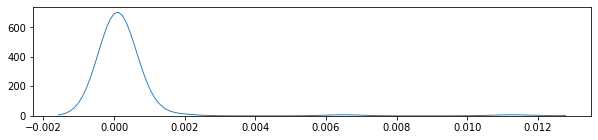

In [69]:
figsize=(10, 2)
fig, ax = plt.subplots(1, 1, figsize=figsize)
#distribution = distribution[~np.isnan(distribution)]
sns.kdeplot(
    distribution,
    bw=Plots._bw_scott(distribution),
    ax=ax,
    linewidth=0.9,
    legend=False,
)

In [ ]:
res.query('chemical=="1001010AD"')['array'].apply(str)

In [49]:
type(r.build.results_measure_arrays['ccg'].query('chemical=="0202010L0"')['array'].values[0][0])

numpy.float64